In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import re
import string
from textblob import TextBlob, Word, Blobber
import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import one_hot
nltk.download('stopwords')
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, LeavePOut, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dream\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dream\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dream\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dream\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:


df = pd.read_csv(r'C:\Users\dream\OneDrive\Desktop\Fake_news\Data\train.csv')

In [5]:

len(df)

20800

In [6]:

df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:


df = df.dropna()

In [8]:
from tqdm.notebook import tqdm, trange
from nltk.stem import PorterStemmer
from autocorrect import Speller
from autocorrect import Speller

spell = Speller(lang='en')

porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
def lower_text(text):
    return str(text).lower()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    stoplist = stopwords.words('english')
    sps = stoplist
    return " ".join([word for word in str(text).split() if word not in sps])

def autospell(text):
    return " ".join([spell(word) for word in text.split()])

corpus=[]
def get_corpus(sentence):
    cps = []
    token_words=word_tokenize(sentence)
    for word in token_words:
        corpus.append(word)
    return sentence


def return_corpus(all_sentences):
    corpus=[]
    for sentence in all_sentences:
        cps = []
        token_words=word_tokenize(sentence)
        for word in token_words:
            corpus.append(word)
    return set(corpus)


def preprocess_text(text):
    text = lower_text(text)
    text = autospell(text)
    text = remove_stopwords(text)
    text = stem_sentence(text)
    return text

In [9]:
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(lemmatization)
df['text'] = df['text'].apply(lower_text)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:


ohr = []
for index in range(len(df)):
    if len(df['text'][index])==0 or len(df['text'][index])==1 or len(df['text'][index])==2:
        ohr.append(index)
print(len(ohr), len(df))
df = df.drop(ohr)
df = df.sample(frac=1).reset_index(drop=True)
print(len(df))



74 18285
18211


In [12]:
df['text'] = df['text'].apply(get_corpus)
df['title'] = df['title'].apply(get_corpus)
df['author'] = df['author'].apply(get_corpus)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\dream/nltk_data'
    - 'c:\\Users\\dream\\anaconda3\\envs\\new_env\\nltk_data'
    - 'c:\\Users\\dream\\anaconda3\\envs\\new_env\\share\\nltk_data'
    - 'c:\\Users\\dream\\anaconda3\\envs\\new_env\\lib\\nltk_data'
    - 'C:\\Users\\dream\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [12]:
corpus = set(corpus)

In [13]:
len(corpus)

218027

# EDA

In [14]:

y_eda=df['label']
X_eda=df.drop('label',axis=1)

In [15]:

len(df[df['label']==1]), len(df[df['label']==0])

(7850, 10361)

<ipython-input-16-0f85f340727b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "label", data = df, palette = "Set1")


Text(0.5, 1.0, 'Bar Chart of label')

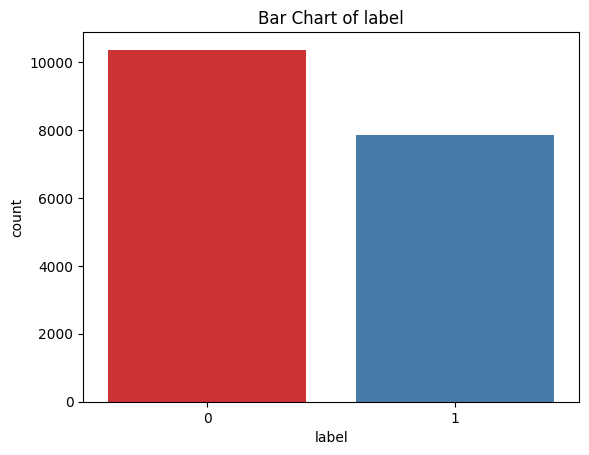

In [16]:
import seaborn as sns
ax = sns.countplot(x = "label", data = df, palette = "Set1")
ax.set_title("Bar Chart of label")

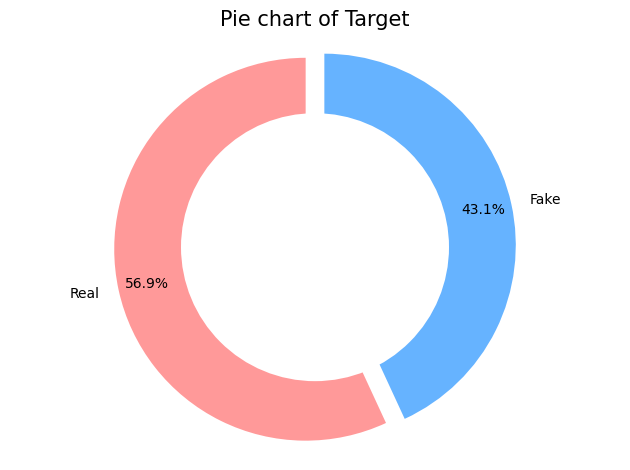

In [17]:
#Pie chart of Target
labels = [ 'Real','Fake']
values = df['label'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title("Pie chart of Target",
              fontdict = {'fontsize' : 15,
                          'fontweight' : 10},
              loc = 'center')
plt.tight_layout()
plt.show()

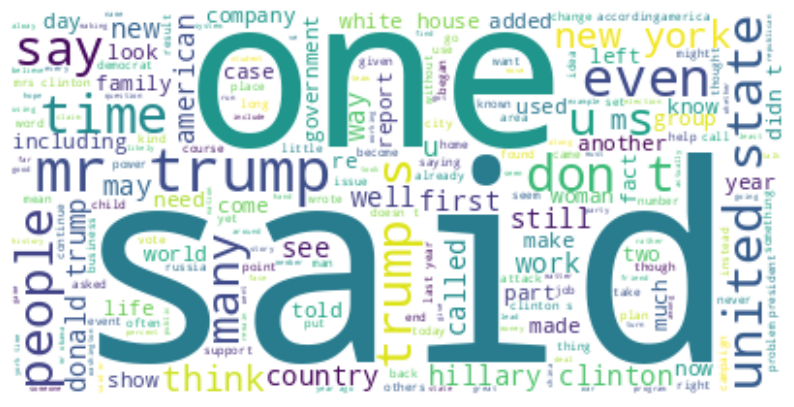

In [18]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Join question into one text
text = " ".join(text for text in df['text'])

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

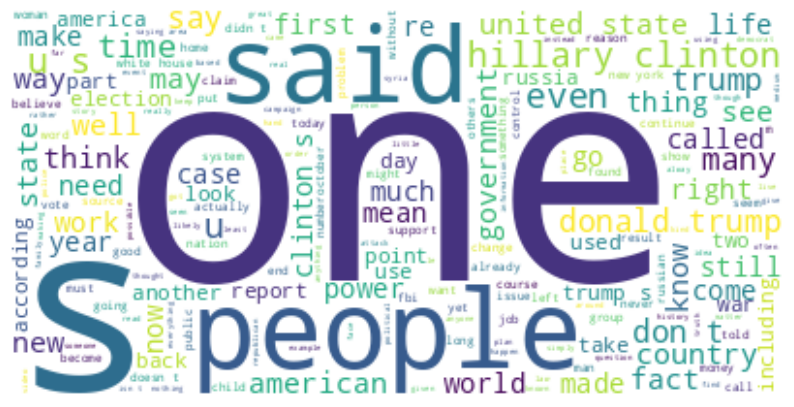

In [19]:

#Join question into one text
text_fake = df.loc[df["label"] == 1, "text"]
text = " ".join(text for text in text_fake)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

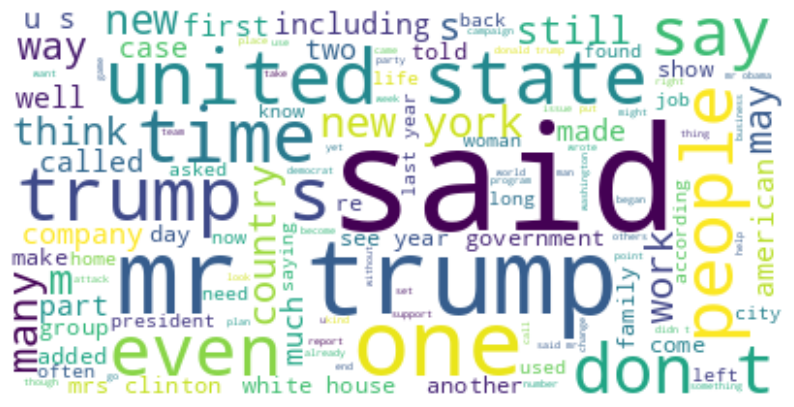

In [20]:

#Join question into one text
text_real = df.loc[df["label"] == 0, "text"]
text = " ".join(text for text in text_real)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<ipython-input-21-1c0214b91c9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_char1, ax = ax1, color = "blue")
<ipython-input-21-1c0214b91c9d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_char2, ax = ax2, color = "red")


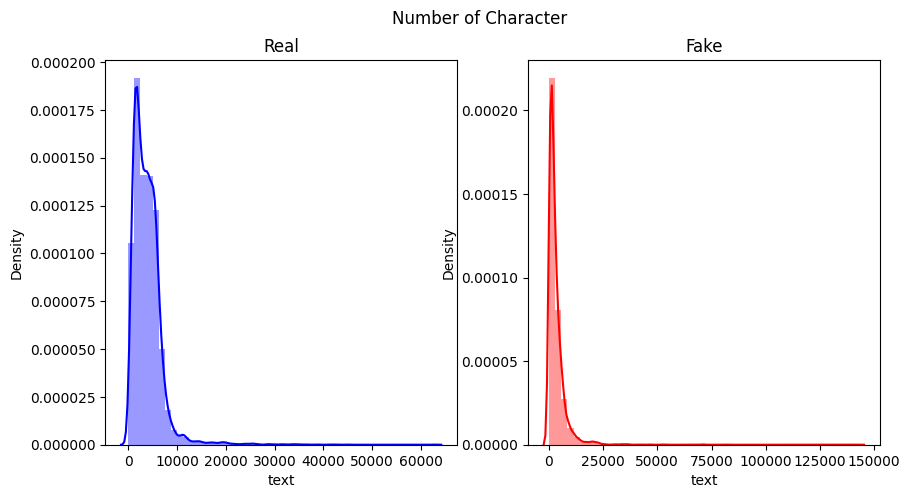

In [21]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_char1 = df.loc[df['label'] == 0, "text"].str.len()
sns.distplot(num_char1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_char2 = df.loc[df['label'] == 1, "text"].str.len()
sns.distplot(num_char2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Character")
plt.show()


<ipython-input-22-66f0375ad39e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_word1, ax = ax1, color = "blue")
<ipython-input-22-66f0375ad39e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_word2, ax = ax2, color = "red")


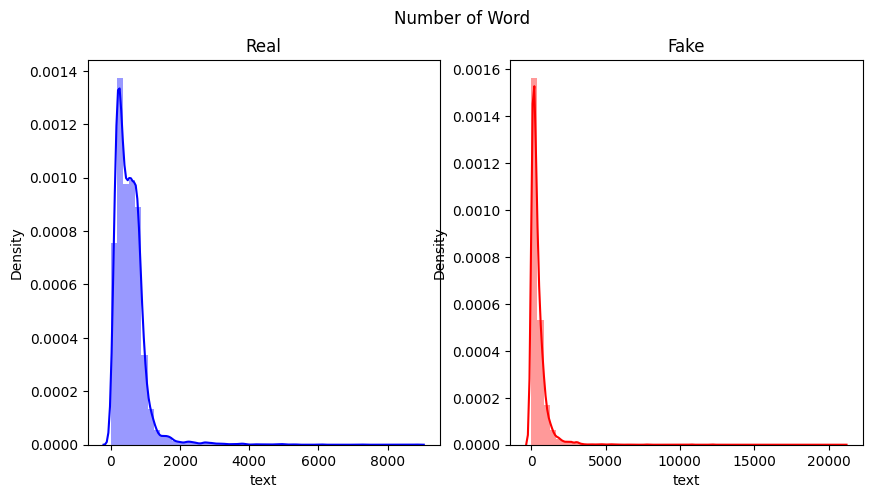

In [22]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_word1 = df.loc[df['label'] == 0, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_word2 = df.loc[df['label'] == 1, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Word")

plt.show()

In [23]:


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



# Ngram Analysis:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


<Axes: >

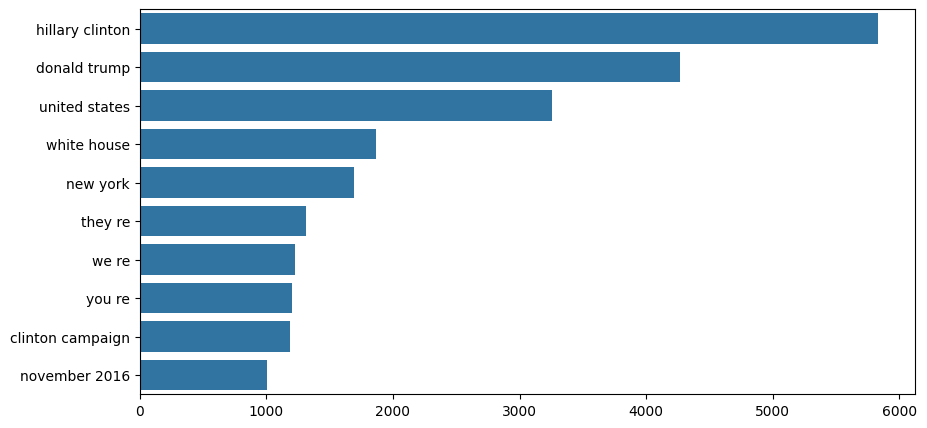

In [24]:

plt.figure(figsize=(10,5))
fake_df = df[df['label']==1]
top_tweet_bigrams=get_top_tweet_bigrams(fake_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)


<Axes: >

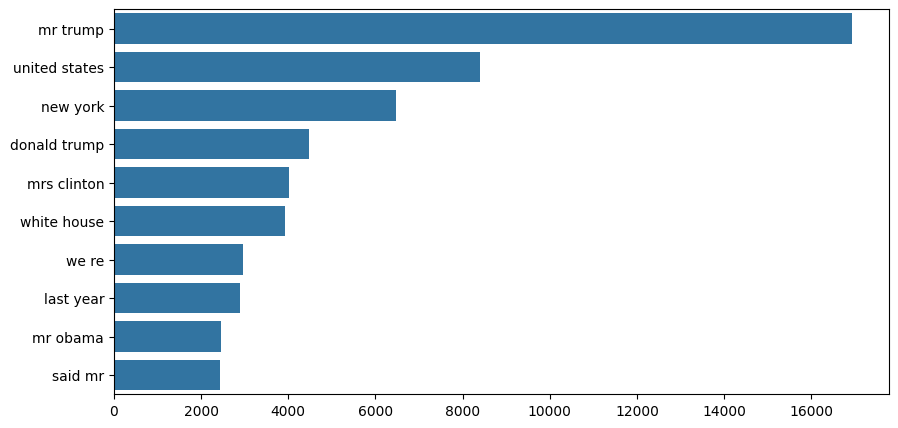

In [25]:
plt.figure(figsize=(10,5))
true_df = df[df['label']==0]
top_tweet_bigrams=get_top_tweet_bigrams(true_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [26]:

X = df['text']
y = df['label']


# LSTM

In [27]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


X = df.drop('label', axis=1)
X = df['text']
y = df['label']
#t = time()  # not compulsory

# loading CountVectorizer

# from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
# #tf_vectorizer = CountVectorizer() # or term frequency
# #tf_vectorizer = TfidfVectorizer()
# tf_vectorizer = HashingVectorizer()

# X_tf = tf_vectorizer.fit_transform(X)

# #duration = time() - t
# #print("Time taken to extract features from training data : %f seconds" % (duration))
# print("n_samples: %d, n_features: %d" % X_tf.shape)



# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.33, random_state=42)


# X_train.shape, X_test.shape, y_train.shape, y_test.shape


# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA

# def TSNE_plot(data, data_labels):
#     # Convert sparse matrix to dense matrix
#     if hasattr(data, "toarray"):
#         data = data.toarray()

#     # Apply PCA before t-SNE
#     pca = PCA(n_components=50, random_state=42)
#     data_pca = pca.fit_transform(data)

#     tsne = TSNE(n_components=2, random_state=50, init="random")
#     transformed_data = tsne.fit_transform(data_pca)
#     k = np.array(transformed_data)

#     # Ensure data_labels are numerical for color mapping
#     data_labels = np.array(data_labels)

#     plt.figure(figsize=(10, 7))
#     scatter = plt.scatter(k[:, 0], k[:, 1], c=data_labels, cmap=plt.get_cmap('jet', 2))
#     plt.colorbar(scatter, ticks=[0, 1], label='Class')
#     plt.title('t-SNE visualization')
#     plt.show()

# # Plot the data
# TSNE_plot(X_train, y_train)


In [32]:
max_features=348

from nltk.tokenize import sent_tokenize,word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = X)
X = tokenizer.texts_to_sequences(texts = X)

X = pad_sequences(sequences = X, maxlen = max_features, padding = 'pre')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
# Define the parameters
max_features = 348  # Set this to the size of your vocabulary
embedding_vector_features = 120
sent_length = 100  # Set this to the length of your input sequences

# Modified model
model = Sequential(name='lstm_nn_model')
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_features, name='1st_layer'))
model.add(LSTM(units=120, dropout=0.2, recurrent_dropout=0.2, name='2nd_layer'))
model.add(Dropout(rate=0.5, name='3rd_layer'))
model.add(Dense(units=120, activation='relu', name='4th_layer'))
model.add(Dropout(rate=0.5, name='5th_layer'))
model.add(Dense(units=len(set(y)), activation='sigmoid', name='output_layer'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
print(model.summary())

Model: "lstm_nn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 1st_layer (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2nd_layer (LSTM)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3rd_layer (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 4th_layer (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 5th_layer (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [45]:
model.fit( X_train, y_train, validation_data=( X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 151s 646ms/step - accuracy: 0.8032 - loss: 0.4199 - val_accuracy: 0.9273 - val_loss: 0.2033
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 200s 640ms/step - accuracy: 0.9007 - loss: 0.2587 - val_accuracy: 0.9001 - val_loss: 0.2452
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 202s 643ms/step - accuracy: 0.9157 - loss: 0.2292 - val_accuracy: 0.9319 - val_loss: 0.1863
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 201s 637ms/step - accuracy: 0.9281 - loss: 0.1958 - val_accuracy: 0.9336 - val_loss: 0.1845
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 202s 636ms/step - accuracy: 0.9269 - loss: 0.1927 - val_accuracy: 0.9311 - val_loss: 0.1884
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 206s 653ms/step - accuracy: 0.9303 - loss: 0.1911 - val_accuracy: 0.9355 - val_loss: 0.1822
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 201s 650ms/step - accuracy: 0.9309 - loss: 0.1952 - val_accuracy: 0.9133 - val_loss: 0.2530
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 147s 647ms/step - accuracy: 0.9258 -

In [46]:
ypred= model.predict(X_test)
y_pred=[ypred>.5]
y_pred=y_pred[0]

114/114 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_pred contains probabilities, convert them to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

y_pred_classes = np.argmax(y_pred_binary, axis=1)

# Assuming y_test is also in class label format
print(confusion_matrix(y_test, y_pred_classes))
print(accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


[[1935  118]
 [ 411 1179]]
0.8547900082349712
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2053
           1       0.91      0.74      0.82      1590

    accuracy                           0.85      3643
   macro avg       0.87      0.84      0.85      3643
weighted avg       0.86      0.85      0.85      3643



In [53]:
model.save(r'C:\Users\dream\OneDrive\Desktop\Fake_news\Model\my_model.h5')
model.save(r'C:\Users\dream\OneDrive\Desktop\Fake_news\Model\my_model.keras')

In [57]:
import pickle

# Define preprocessing functions here...

# Save functions
with open('/content/drive/MyDrive/ML/ML Problems/Fake News Classifier/Models/preprocessing_functions.pkl', 'wb') as file:
    pickle.dump({
        'lower_text': lower_text,
        'stem_sentence': stemSentence,
        'lemmatization': lemmatization,
        'remove_stopwords': remove_stopwords,
        'autospell': autospell,
        'preprocess_text': preprocess_text
    }, file)
